In [1]:
import os
import cv2 
import time 
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file

base_dir = 'WeaponDetection'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_healthy_dir = os.path.join(train_dir, 'threat')
train_unhealthy_dir = os.path.join(train_dir, 'nothreat')

validation_healthy_dir = os.path.join(validation_dir, 'threat')
validation_unhealthy_dir = os.path.join(validation_dir, 'nothreat')

In [2]:
train_healthy_fnames = os.listdir(train_healthy_dir)
train_unhealthy_fnames = os.listdir(train_unhealthy_dir)

print(train_healthy_fnames[:10])
print(train_unhealthy_fnames[:10])

['-1.jpg', '-10.jpg', '-11.jpg', '-12.jpg', '-13.jpg', '-2.jpg', '-3.jpg', '-4.jpg', '-5.jpg', '-6.jpg']
['buddha (10).jpg', 'buddha (11).jpg', 'buddha (12).jpg', 'buddha (13).jpg', 'buddha (14).jpg', 'buddha (15).jpg', 'buddha (16).jpg', 'buddha (17).jpg', 'buddha (18).jpg', 'buddha (19).jpg']


In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

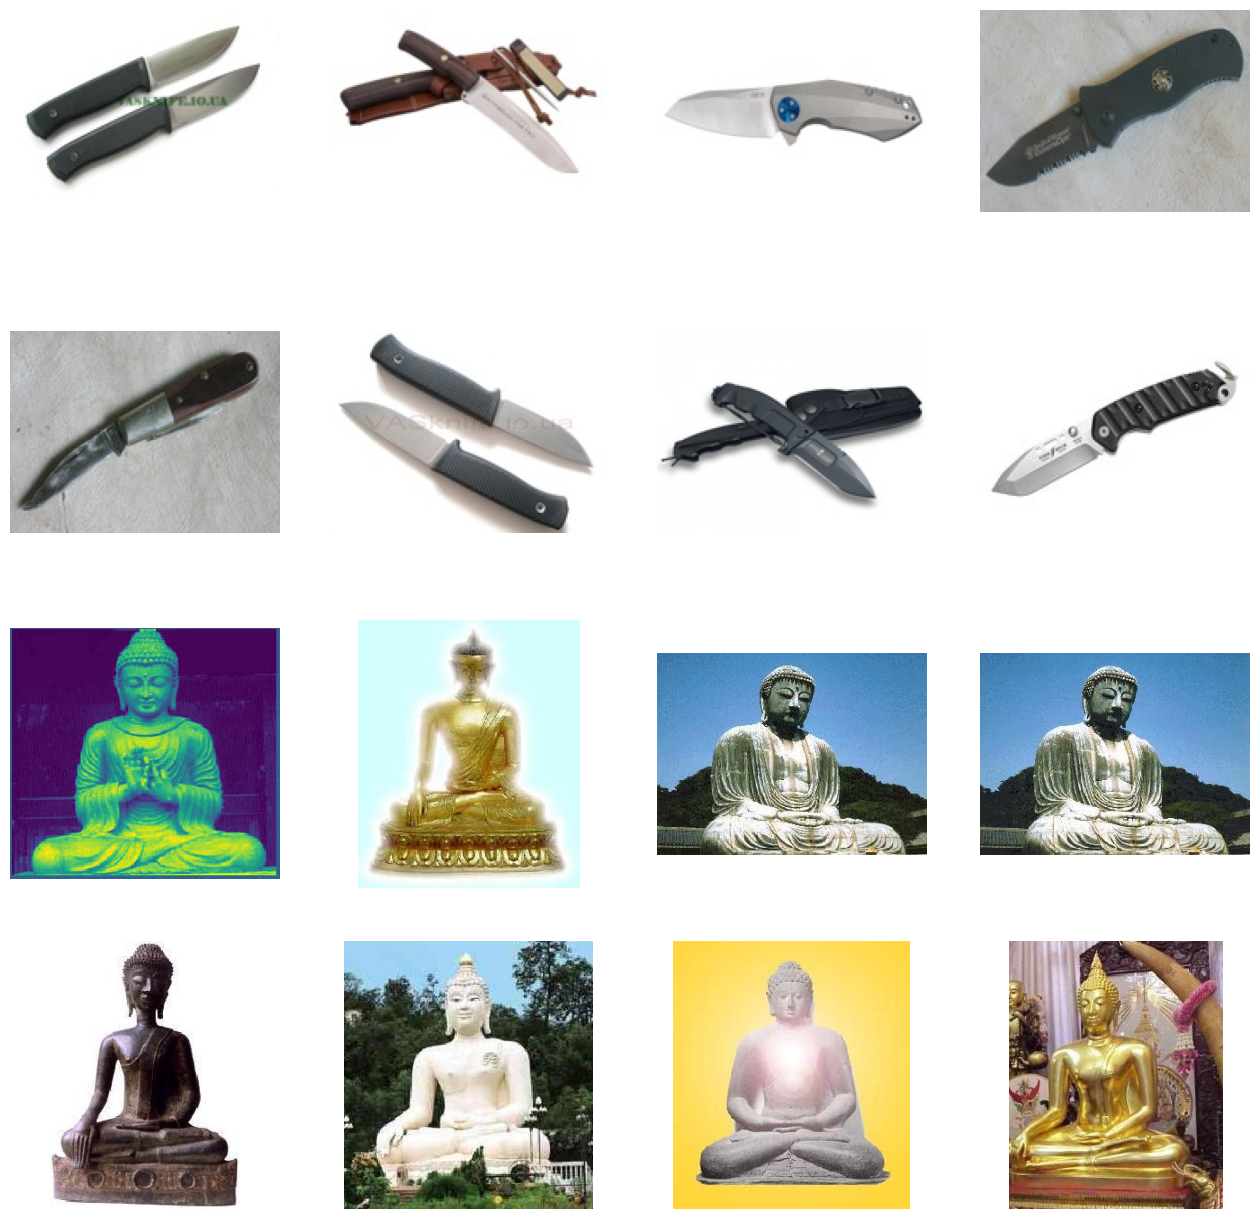

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_healthy_pix = [os.path.join(train_healthy_dir, fname)
                   for fname in train_healthy_fnames[pic_index-8:pic_index]
                   ]

next_unhealthy_pix = [os.path.join(train_unhealthy_dir, fname)
                   for fname in train_unhealthy_fnames[pic_index-8:pic_index]
                   ]

for i, img_path in enumerate(next_healthy_pix+next_unhealthy_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  
                                                    target_size=(250, 250),  
                                                    batch_size=16,
                                                    class_mode='binary')

# Flow validation images in batches of 16 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(250, 250),
                                                        batch_size=16,
                                                        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model() :
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(250, 250, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(learning_rate=1e-4),
                    metrics=['accuracy'])
    
    return model

In [29]:
# Constant for epochs
EPOCHS = 100

model = create_model()

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=10, 
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2)

model.save('my_model.h5')

Epoch 1/100
10/10 - 2s - 247ms/step - accuracy: 0.4563 - loss: 0.6936 - val_accuracy: 0.4875 - val_loss: 0.6879
Epoch 2/100
10/10 - 1s - 113ms/step - accuracy: 0.5000 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6845
Epoch 3/100
10/10 - 1s - 57ms/step - accuracy: 0.5125 - loss: 0.6827 - val_accuracy: 0.4500 - val_loss: 0.6850
Epoch 4/100
10/10 - 1s - 132ms/step - accuracy: 0.4750 - loss: 0.6859 - val_accuracy: 0.5000 - val_loss: 0.6797
Epoch 5/100
10/10 - 1s - 113ms/step - accuracy: 0.5437 - loss: 0.6714 - val_accuracy: 0.4875 - val_loss: 0.6986
Epoch 6/100
10/10 - 1s - 56ms/step - accuracy: 0.4375 - loss: 0.6907 - val_accuracy: 0.5500 - val_loss: 0.6579
Epoch 7/100
10/10 - 1s - 132ms/step - accuracy: 0.5188 - loss: 0.6674 - val_accuracy: 0.6625 - val_loss: 0.6644
Epoch 8/100
10/10 - 1s - 115ms/step - accuracy: 0.5938 - loss: 0.6496 - val_accuracy: 0.5250 - val_loss: 0.6504
Epoch 9/100
10/10 - 1s - 57ms/step - accuracy: 0.5750 - loss: 0.6582 - val_accuracy: 0.7750 - val_loss: 0.

In [30]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

plt.show()

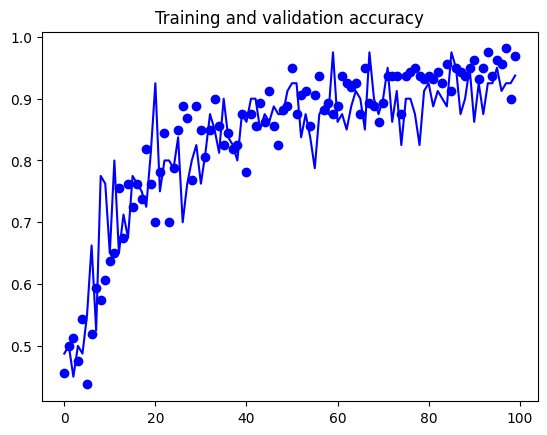

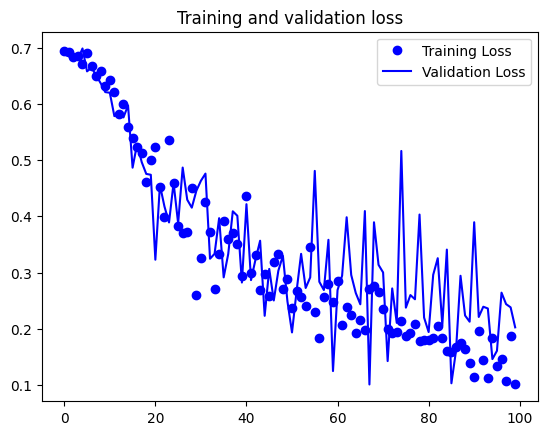

In [31]:
plot_loss_acc(history)

In [32]:
labels = ['download']
number_imgs = 10

In [33]:
IMAGES_PATH = 'C:\\Users\\Shashwat\\Downloads'
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

In [34]:
import uuid
import os
import time

In [27]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This image is 0.00% safe and 100.00% unsafe.


C:\Users\Shashwat\AppData\Local\Temp\ipykernel_15064\2573050081.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(predictions[0])


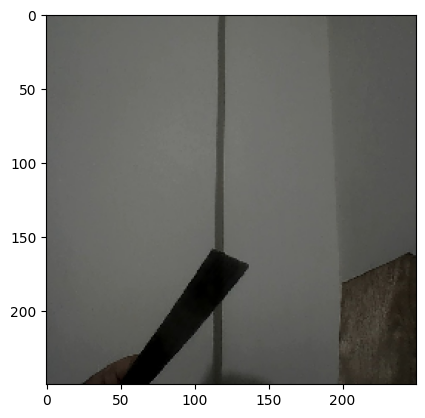

In [28]:
from tensorflow import keras
img = keras.utils.load_img(
    "C:\\Users\\Shashwat\\Downloads\\download\\download (1).jpg", target_size=(250,250)
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% safe and {100 * score:.2f}% unsafe.")